In [1]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings("ignore")

In [2]:
INFILE = "HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"


In [3]:
df = pd.read_csv( INFILE )

dt = df.dtypes
#print( dt )

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

In [4]:
"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

In [5]:
'''
CREATE OBJECT and NUMBER List
'''

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

In [6]:
print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print( i )
print(" ------- ")

 OBJECTS 
 ------- 
IMP_REASON
IMP_JOB
 ------- 


In [7]:
print(" NUMBERS ")
print(" ------- ")
for i in numList :
    print( i )
print(" ------- ")

 NUMBERS 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC
 ------- 


In [8]:
'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''


for i in objList :
    print(" Class = ", i )
    g = df.groupby( i )
    print( g[i].count() )
    x = g[ TARGET_F ].mean()
    print( "Loan Default Prob", x )
    print( " ................. ")
    x = g[ TARGET_A ].mean()
    print( "Loss Amount", x )
    print(" ===============\n\n\n ")

 Class =  IMP_REASON
IMP_REASON
DebtCon    3928
HomeImp    1780
MISSING     252
Name: IMP_REASON, dtype: int64
Loan Default Prob IMP_REASON
DebtCon    0.189664
HomeImp    0.222472
MISSING    0.190476
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount IMP_REASON
DebtCon    16005.163758
HomeImp     8388.090909
MISSING    14675.020833
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  IMP_JOB
IMP_JOB
MISSING     279
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64
Loan Default Prob IMP_JOB
MISSING    0.082437
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount IMP_JOB
MISSING    13162.173913
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtyp

In [9]:
'''
CHECK FOR MISSING DATA
'''

for i in objList :
    print( i )
    print( df[i].unique() )
    g = df.groupby( i )
    print( g[i].count() )
    print( "MOST COMMON = ", df[i].mode()[0] )   
    print( "MISSING = ", df[i].isna().sum() )
    print( "\n\n")


IMP_REASON
['HomeImp' 'MISSING' 'DebtCon']
IMP_REASON
DebtCon    3928
HomeImp    1780
MISSING     252
Name: IMP_REASON, dtype: int64
MOST COMMON =  DebtCon
MISSING =  0



IMP_JOB
['Other' 'MISSING' 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
IMP_JOB
MISSING     279
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64
MOST COMMON =  Other
MISSING =  0





In [10]:
"""
FOR OBJECTS - FILL IN MISSING WITH THE MODE
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    print( i ) 
    print("HAS MISSING")
    NAME = "IMP_"+i
    print( NAME ) 
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna(df[NAME].mode()[0] )
    print( "variable",i," has this many missing", df[i].isna().sum() )
    print( "variable",NAME," has this many missing", df[NAME].isna().sum() )
    g = df.groupby( NAME )
    print( g[NAME].count() )
    print( "\n\n")
    df = df.drop( i, axis=1 )

In [11]:
dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

In [12]:
print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print( i )
print(" ------- ")


 OBJECTS 
 ------- 
IMP_REASON
IMP_JOB
 ------- 


In [13]:
'''
EXPLORE OBJECT VARIABLES ONCE AGAIN AFTER FILLING IN MISSING WITH MODE
'''

for i in objList :
    print(" Class = ", i )
    print( df[i].unique() )
    g = df.groupby( i )
    x = g[ TARGET_F ].mean()
    print( "Loan Default Prob", x )
    print( " ................. ")
    x = g[ TARGET_A ].mean()
    x = g[ TARGET_A ].median()
    print( "Loss Amount", x )
    print(" ===============\n\n\n ")

 Class =  IMP_REASON
['HomeImp' 'MISSING' 'DebtCon']
Loan Default Prob IMP_REASON
DebtCon    0.189664
HomeImp    0.222472
MISSING    0.190476
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount IMP_REASON
DebtCon    13630.0
HomeImp     5784.5
MISSING    13500.0
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  IMP_JOB
['Other' 'MISSING' 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
Loan Default Prob IMP_JOB
MISSING    0.082437
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount IMP_JOB
MISSING    14160.0
Mgr        12779.0
Office     10208.0
Other       9332.0
ProfExe    12438.5
Sales      15614.0
Self       18484.5
Name: TARGET_LOSS_AMT, dtype: float64


 


In [14]:
'''
FOR NUMBER VARIABLES - IMPUTE USING THE MEDIAN
'''

for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    print( df[i].isna().sum() )
    print( FLAG )
    print( IMP )
    print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )


518
M_MORTDUE
IMP_MORTDUE
 ------- 
112
M_VALUE
IMP_VALUE
 ------- 
515
M_YOJ
IMP_YOJ
 ------- 
708
M_DEROG
IMP_DEROG
 ------- 
580
M_DELINQ
IMP_DELINQ
 ------- 
308
M_CLAGE
IMP_CLAGE
 ------- 
510
M_NINQ
IMP_NINQ
 ------- 
222
M_CLNO
IMP_CLNO
 ------- 
1267
M_DEBTINC
IMP_DEBTINC
 ------- 


In [15]:
"""
FILL IN MISSING WITH THE CATEGORY "MISSING".  ALSO CREATE IMP_ VARIABLES
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


In [16]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641,1109,767,1425,NaN
LOAN,1100,1300,1500,1500,1700
IMP_REASON,HomeImp,HomeImp,HomeImp,MISSING,HomeImp
IMP_JOB,Other,Other,Other,MISSING,Office
M_MORTDUE,0,0,0,1,0
IMP_MORTDUE,25860,70053,13500,65019,97800
M_VALUE,0,0,0,1,0
IMP_VALUE,39025,68400,16700,89235.5,112000
M_YOJ,0,0,0,1,0


In [17]:
dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

In [18]:
'''
USE ONE HOT ENCODING TO CONVERT STRING OBJECT VALUES TO NUMERICAL VALUES, THEN DROP OBJECT VARIABLES
'''

for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )   
    y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    df = df.drop( i, axis=1 )

In [19]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
M_MORTDUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_MORTDUE,25860.000000,70053.000000,13500.000000,65019.000000,97800.000000
M_VALUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_VALUE,39025.000000,68400.000000,16700.000000,89235.500000,112000.000000
M_YOJ,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_YOJ,10.500000,7.000000,4.000000,7.000000,3.000000
M_DEROG,0.000000,0.000000,0.000000,1.000000,0.000000


In [20]:
#Assignment 2 starts here
#First make a copy of the df
X = df.copy()

#drop target variables from copy since we don't want to use them as predictors
X = X.drop( TARGET_F, axis=1 )
X = X.drop( TARGET_A, axis=1 )
X.head().T

,0,1,2,3,4
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
M_MORTDUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_MORTDUE,25860.000000,70053.000000,13500.000000,65019.000000,97800.000000
M_VALUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_VALUE,39025.000000,68400.000000,16700.000000,89235.500000,112000.000000
M_YOJ,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_YOJ,10.500000,7.000000,4.000000,7.000000,3.000000
M_DEROG,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_DEROG,0.000000,0.000000,0.000000,0.000000,0.000000
M_DELINQ,0.000000,0.000000,0.000000,1.000000,0.000000


In [21]:
#STORE TARGET VARIABLES IN pred variable.  Use var TO PREDICT pred
Y = df[ [TARGET_F, TARGET_A] ]
Y.head().T


,0,1,2,3,4
TARGET_BAD_FLAG,1.0,1.0,1.0,1.0,0.0
TARGET_LOSS_AMT,641.0,1109.0,767.0,1425.0,NaN


In [22]:
#Now we need to split data, 80/20 split for training and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=4)

#in case we want random samples all the time
#X_train, X_test, Y_train, Y_test = train_test_split(var, pred, train_size=0.8, test_size=0.2)

#Breakdown of datasets:
print( "DATASETS" )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )


DATASETS
TRAINING =  (4768, 29)
TEST =  (1192, 29)


In [23]:
X_test.head().T

,194,4411,1392,3827,2592
LOAN,5100.000000,22900.000000,10800.000000,20000.000000,15000.000000
M_MORTDUE,0.000000,0.000000,0.000000,0.000000,0.000000
IMP_MORTDUE,179725.000000,131767.000000,64305.000000,105422.000000,54294.000000
M_VALUE,0.000000,0.000000,0.000000,0.000000,0.000000
IMP_VALUE,251962.000000,174684.000000,107374.000000,146613.000000,85460.000000
M_YOJ,1.000000,0.000000,0.000000,1.000000,0.000000
IMP_YOJ,7.000000,24.000000,9.000000,7.000000,18.000000
M_DEROG,0.000000,1.000000,0.000000,1.000000,0.000000
IMP_DEROG,0.000000,0.000000,0.000000,0.000000,0.000000
M_DELINQ,0.000000,0.000000,0.000000,1.000000,0.000000


In [24]:
#record nums between var_test and pred_test should be the same
Y_test.head().T

,194,4411,1392,3827,2592
TARGET_BAD_FLAG,0.0,0.0,1.0,0.0,1.0
TARGET_LOSS_AMT,NaN,NaN,10297.0,NaN,15632.0


In [25]:

F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

In [26]:
#begin Assignment 3 here
#add functions for model accuracy metrics and ROC curve:

def getProbAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    probs = MODEL.predict_proba( X )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_ROC_Curve( TITLE, LIST ) :
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

def getAmtAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    MEAN = Y.mean()
    RMSE = math.sqrt( metrics.mean_squared_error( Y, pred))
    return [NAME, RMSE, MEAN]



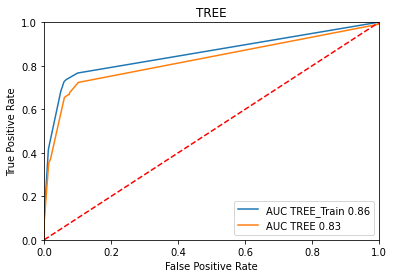

TREE CLASSIFICATION ACCURACY
TREE_Train  =  0.8978607382550335
TREE  =  0.8766778523489933
------




In [27]:
#First is Decision Tree - use function to get tree variables

def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

#use variable WHO as identifier for each method
WHO = "TREE"

DEF = tree.DecisionTreeClassifier( max_depth=4 )  #can play around with max_depth here for tree
DEF = DEF.fit( X_train, Y_train[ TARGET_F ] )  # fit the model w/ training data

TRAIN_DEF = getProbAccuracyScores( WHO + "_Train", DEF, X_train, Y_train[ TARGET_F ] )  #get accuracy scores for train and test sets
TEST_DEF = getProbAccuracyScores( WHO, DEF, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_DEF, TEST_DEF ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_DEF, TEST_DEF ] )

feature_cols = list( X.columns.values )
tree.export_graphviz(DEF,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )
vars_tree_flag = getTreeVars( DEF, feature_cols ) 

In [28]:
# losses for Tree

AMT = tree.DecisionTreeRegressor( max_depth= 4 )
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( AMT, feature_cols ) 
tree.export_graphviz(AMT,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )


TREE_DEF = TEST_DEF.copy()
TREE_AMT = TEST_AMT.copy()


TREE RMSE ACCURACY
TREE_Train  =  4343.228805529883
TREE  =  5722.46895603711
------




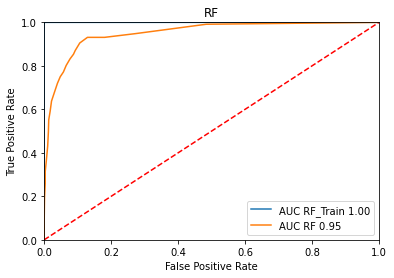

RF CLASSIFICATION ACCURACY
RF_Train  =  0.9995805369127517
RF  =  0.912751677852349
------




In [29]:
#Random Forest

def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

WHO = "RF"

DEF = RandomForestClassifier( n_estimators = 25, random_state=1 )
DEF = DEF.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_DEF = getProbAccuracyScores( WHO + "_Train", DEF, X_train, Y_train[ TARGET_F ] )
TEST_DEF = getProbAccuracyScores( WHO, DEF, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_DEF, TEST_DEF ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_DEF, TEST_DEF ] )


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( DEF, feature_cols )


In [30]:
# Losses for RF

AMT = RandomForestRegressor(n_estimators = 100, random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_RF_amt :
    print( i )

RF_DEF = TEST_DEF.copy()
RF_AMT = TEST_AMT.copy()

RF RMSE ACCURACY
RF_Train  =  1241.3059777597757
RF  =  2951.0813707195125
------


('LOAN', 100)
('IMP_CLNO', 10)
('M_DEBTINC', 7)


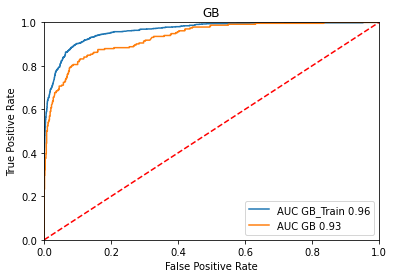

GB CLASSIFICATION ACCURACY
GB_Train  =  0.9228187919463087
GB  =  0.910234899328859
------




In [31]:
#Gradient Boosting

WHO = "GB"

DEF = GradientBoostingClassifier( random_state=1 )
DEF = DEF.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_DEF = getProbAccuracyScores( WHO + "_Train", DEF, X_train, Y_train[ TARGET_F ] )
TEST_DEF = getProbAccuracyScores( WHO, DEF, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_DEF, TEST_DEF ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_DEF, TEST_DEF ] )


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( DEF, feature_cols )


In [32]:
# Losses for GB

AMT = GradientBoostingRegressor(random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_RF_amt :
    print( i )

GB_DEF = TEST_DEF.copy()
GB_AMT = TEST_AMT.copy()

GB RMSE ACCURACY
GB_Train  =  1154.1617377334758
GB  =  2422.2769707799052
------


('LOAN', 100)
('IMP_CLNO', 10)
('M_DEBTINC', 7)


In [33]:
#next is to use regression models.  Use these functions here to get coefficients

def getCoefLogit( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nLOAN DEFAULT")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )



def getCoefLinear( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_
    for coef, feat in zip(MODEL.coef_,varNames):
        coef_dict[feat] = coef
    print("\nLOSSES")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )

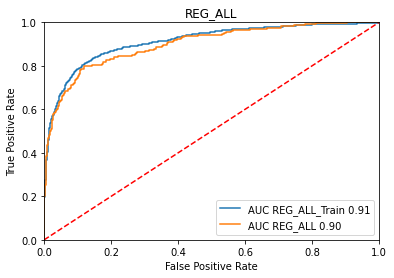

REG_ALL CLASSIFICATION ACCURACY
REG_ALL_Train  =  0.893246644295302
REG_ALL  =  0.8901006711409396
------




In [34]:
# Perform Logistic Regression for loan defaults using ALL variables

WHO = "REG_ALL"

DEF = LogisticRegression( solver='newton-cg', max_iter=1300 )  #play around with the solver and try different ones.  This is heuristic (trial and error 
#approach.  Not an algorithm like with linear regression is matrix-based.  Also play with max_iter.  Default setting is 100.
#Increasing max_iter can add time to model running
DEF = DEF.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_DEF = getProbAccuracyScores( WHO + "_Train", DEF, X_train, Y_train[ TARGET_F ] )
TEST_DEF = getProbAccuracyScores( WHO, DEF, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_DEF, TEST_DEF ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_DEF, TEST_DEF ] )

In [35]:
#Now perform Linear regression for losses using all variables

AMT = LinearRegression()
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

REG_ALL_DEF_COEF = getCoefLogit( DEF, X_train )
REG_ALL_AMT_COEF = getCoefLinear( AMT, X_train )

REG_ALL_DEF = TEST_DEF.copy()
REG_ALL_AMT = TEST_AMT.copy()


REG_ALL RMSE ACCURACY
REG_ALL_Train  =  3554.7719768636875
REG_ALL  =  3634.676632630516
------



LOAN DEFAULT
---------
Total Variables:  30
INTERCEPT  =  -5.27668060154855
LOAN  =  -1.0295358313119435e-05
M_MORTDUE  =  0.4200858316598597
IMP_MORTDUE  =  -3.1497463954336673e-06
M_VALUE  =  4.1486593008294195
IMP_VALUE  =  3.925601203506672e-06
M_YOJ  =  -0.5676494165417473
IMP_YOJ  =  -0.017048275209458903
M_DEROG  =  -1.6015786335800613
IMP_DEROG  =  0.4969982163922892
M_DELINQ  =  -0.4397344539630137
IMP_DELINQ  =  0.7697808848260285
M_CLAGE  =  1.1910352312931647
IMP_CLAGE  =  -0.005141361785528377
M_NINQ  =  -0.1475220920716788
IMP_NINQ  =  0.13104654559047677
M_CLNO  =  2.112934344281299
IMP_CLNO  =  -0.015837048478498157
M_DEBTINC  =  2.6336047112456993
IMP_DEBTINC  =  0.1009676469892785
z_IMP_REASON_DebtCon  =  -0.05034050600143426
z_IMP_REASON_HomeImp  =  0.059757539044415636
z_IMP_REASON_MISSING  =  -0.14339272007709877
z_IMP_JOB_MISSING  =  -1.5505815790692699
z_IMP_JOB_Mgr

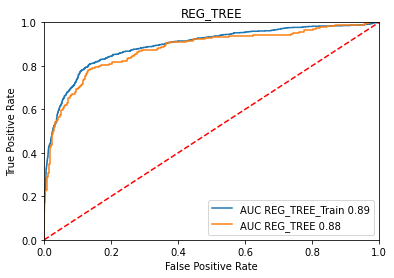

REG_TREE CLASSIFICATION ACCURACY
REG_TREE_Train  =  0.884018456375839
REG_TREE  =  0.8766778523489933
------




In [36]:
#Log Regression w/ Decision tree vars

#Decision tree is good for variable selection
#will not always work depending on data set

WHO = "REG_TREE"

DEF = LogisticRegression( solver='newton-cg', max_iter=1000 )
DEF = DEF.fit( X_train[vars_tree_flag], Y_train[ TARGET_F ] ) #using vars_tree_flag - will only use the variables that the decision tree likes (from decision
#tree creation up above)

TRAIN_DEF = getProbAccuracyScores( WHO + "_Train", DEF, X_train[vars_tree_flag], Y_train[ TARGET_F ] )
TEST_DEF = getProbAccuracyScores( WHO, DEF, X_test[vars_tree_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_DEF, TEST_DEF ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_DEF, TEST_DEF ] )

In [37]:
# Lin Regression w/ Decision tree vars

AMT = LinearRegression()
AMT = AMT.fit( W_train[vars_tree_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[vars_tree_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[vars_tree_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

REG_TREE_DEF_COEF = getCoefLogit( DEF, X_train[vars_tree_flag] )
REG_TREE_AMT_COEF = getCoefLinear( AMT, X_train[vars_tree_amt] )

REG_TREE_DEF = TEST_DEF.copy()
REG_TREE_AMT = TEST_AMT.copy()

REG_TREE RMSE ACCURACY
REG_TREE_Train  =  4270.166211750314
REG_TREE  =  4246.8855302376705
------



LOAN DEFAULT
---------
Total Variables:  12
INTERCEPT  =  -4.896031366213855
IMP_MORTDUE  =  -3.981370560589925e-06
M_VALUE  =  4.15750974378733
IMP_VALUE  =  2.8834454023026363e-06
M_YOJ  =  -0.23403595350017695
IMP_YOJ  =  -0.02617075363199533
M_DEROG  =  -0.7978804088683381
IMP_DELINQ  =  0.6959767712808627
IMP_CLAGE  =  -0.00583788190662391
M_DEBTINC  =  2.7961635050097247
IMP_DEBTINC  =  0.09693875611294382
z_IMP_JOB_MISSING  =  -0.8565136798981998

LOSSES
---------
Total Variables:  6
INTERCEPT  =  -5934.739581574515
LOAN  =  0.7913013325929467
IMP_CLAGE  =  -21.327024610134355
IMP_CLNO  =  268.64533481236214
M_DEBTINC  =  5515.043126918644
z_IMP_JOB_ProfExe  =  -902.9326935230187





('M_DEBTINC', 100)
('IMP_DEBTINC', 93)
('IMP_CLAGE', 54)
('IMP_DELINQ', 53)
('LOAN', 45)
('IMP_VALUE', 45)
('IMP_MORTDUE', 40)
('IMP_CLNO', 39)
('IMP_YOJ', 33)
('IMP_DEROG', 26)
('IMP_NINQ', 25)



('LOAN', 100)
('IMP_CLNO', 10)
('M_DEBTINC', 7)


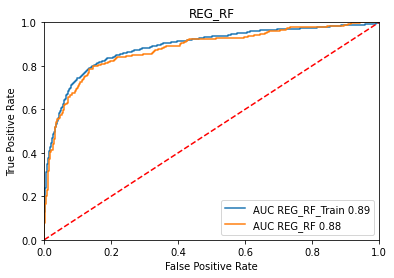

REG_RF CLASSIFICATION ACCURACY
REG_RF_Train  =  0.8787751677852349
REG_RF  =  0.875
------




In [38]:
#Log regression w/ RF vars

WHO = "REG_RF"


print("\n\n")
RF_flag = []
for i in vars_RF_flag :
    print(i)
    theVar = i[0]
    RF_flag.append( theVar )

print("\n\n")
RF_amt = []
for i in vars_RF_amt :
    print(i)
    theVar = i[0]
    RF_amt.append( theVar )


DEF = LogisticRegression( solver='newton-cg', max_iter=1000 )
DEF = DEF.fit( X_train[RF_flag], Y_train[ TARGET_F ] )

TRAIN_DEF = getProbAccuracyScores( WHO + "_Train", DEF, X_train[RF_flag], Y_train[ TARGET_F ] )
TEST_DEF = getProbAccuracyScores( WHO, DEF, X_test[RF_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_DEF, TEST_DEF ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_DEF, TEST_DEF ] )

In [39]:
# Lin Regression for losses w/ RF vars

AMT = LinearRegression()
AMT = AMT.fit( W_train[RF_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[RF_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[RF_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


REG_RF_DEF_COEF = getCoefLogit( DEF, X_train[RF_flag] )
REG_RF_AMT_COEF = getCoefLinear( AMT, X_train[RF_amt] )

REG_RF_DEF = TEST_DEF.copy()
REG_RF_AMT = TEST_AMT.copy()

REG_RF RMSE ACCURACY
REG_RF_Train  =  4651.91877159145
REG_RF  =  4358.06472084949
------



LOAN DEFAULT
---------
Total Variables:  12
INTERCEPT  =  -4.854857375854726
M_DEBTINC  =  2.720860791707879
IMP_DEBTINC  =  0.09280913102379856
IMP_CLAGE  =  -0.005027851670927503
IMP_DELINQ  =  0.6921458784775822
LOAN  =  -1.1737001289415235e-05
IMP_VALUE  =  3.3623830903807117e-06
IMP_MORTDUE  =  -1.7052633119179275e-06
IMP_CLNO  =  -0.020497713391106384
IMP_YOJ  =  -0.013998624008999372
IMP_DEROG  =  0.5385487703825026
IMP_NINQ  =  0.10112967605694367

LOSSES
---------
Total Variables:  4
INTERCEPT  =  -8429.336871738546
LOAN  =  0.7759234067450504
IMP_CLNO  =  236.65192099196403
M_DEBTINC  =  5531.1424077210595





('M_DEBTINC', 100)
('IMP_DEBTINC', 28)
('IMP_DELINQ', 19)
('IMP_CLAGE', 14)
('M_VALUE', 9)



('LOAN', 100)
('IMP_CLNO', 12)
('M_DEBTINC', 9)


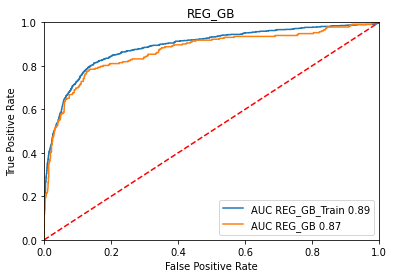

REG_GB CLASSIFICATION ACCURACY
REG_GB_Train  =  0.8764681208053692
REG_GB  =  0.8766778523489933
------




In [41]:
#Log Regression w/ GB vars

WHO = "REG_GB"


print("\n\n")
GB_flag = []
for i in vars_GB_flag :
    print(i)
    theVar = i[0]
    GB_flag.append( theVar )

print("\n\n")
GB_amt = []
for i in vars_GB_amt :
    print(i)
    theVar = i[0]
    GB_amt.append( theVar )


DEF = LogisticRegression( solver='newton-cg', max_iter=1000 )
DEF = DEF.fit( X_train[GB_flag], Y_train[ TARGET_F ] )

TRAIN_DEF = getProbAccuracyScores( WHO + "_Train", DEF, X_train[GB_flag], Y_train[ TARGET_F ] )
TEST_DEF = getProbAccuracyScores( WHO, DEF, X_test[GB_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_DEF, TEST_DEF ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_DEF, TEST_DEF ] )

In [42]:
# Lin Regression for losses w/ GB vars

AMT = LinearRegression()
AMT = AMT.fit( W_train[GB_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_GB_DEF_COEF = getCoefLogit( DEF, X_train[GB_flag] )
REG_GB_AMT_COEF = getCoefLinear( AMT, X_train[GB_amt] )

REG_GB_DEF = TEST_DEF.copy()
REG_GB_AMT = TEST_AMT.copy()


REG_GB RMSE ACCURACY
REG_GB_Train  =  4651.91877159145
REG_GB  =  4358.06472084949
------



LOAN DEFAULT
---------
Total Variables:  6
INTERCEPT  =  -5.253791958290608
M_DEBTINC  =  2.7852547405973587
IMP_DEBTINC  =  0.1003625208977268
IMP_DELINQ  =  0.6751064988667513
IMP_CLAGE  =  -0.0063466711459535564
M_VALUE  =  3.6790394317025976

LOSSES
---------
Total Variables:  4
INTERCEPT  =  -8429.336871738546
LOAN  =  0.7759234067450504
IMP_CLNO  =  236.65192099196403
M_DEBTINC  =  5531.1424077210595


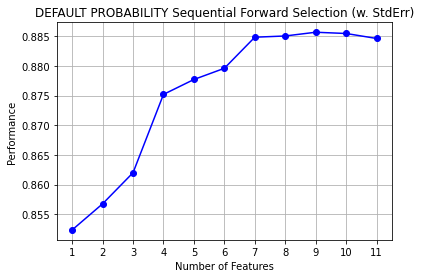

 ................... 
argmax
feature_names    (1, 4, 5, 6, 7, 8, 9, 10)
avg_score                         0.885067
Name: 8, dtype: object
 ................... 
('1', '4', '5', '6', '7', '8', '9', '10')
M_VALUE
IMP_YOJ
M_DEROG
IMP_DELINQ
IMP_CLAGE
M_DEBTINC
IMP_DEBTINC
z_IMP_JOB_MISSING


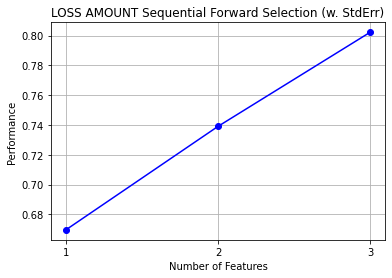

 ................... 
argmax
feature_names      (0, 1)
avg_score        0.739046
Name: 2, dtype: object
 ................... 
('0', '1')
LOAN
IMP_CLNO


In [43]:
#Regression stepwise

U_train = X_train[ vars_tree_flag ]
stepVarNames = list( U_train.columns.values )
maxCols = U_train.shape[1]

sfs = SFS( LogisticRegression( solver='newton-cg', max_iter=1000 ),
           k_features=( 1, maxCols ),  #build me te best models w/ 1 var, best w/ 2, etc all the way to maxCols.  Can take a long time
           forward=True,
           floating=False,
           cv=3
           )
sfs.fit(U_train.values, Y_train[ TARGET_F ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('DEFAULT PROBABILITY Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax() - 1
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

U_train = X_train[ finalStepVars ]
U_test = X_test[ finalStepVars ]



V_train = W_train[ GB_amt ]  #use a smaller dataset
stepVarNames = list( V_train.columns.values )
maxCols = V_train.shape[1]

sfs = SFS( LinearRegression(),  #linear regression will run a little faster
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           scoring = 'r2',
           cv=5
           )
sfs.fit(V_train.values, Z_train[ TARGET_A ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('LOSS AMOUNT Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax() - 1
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

V_train = W_train[ finalStepVars ]
V_test = W_test[ finalStepVars ]



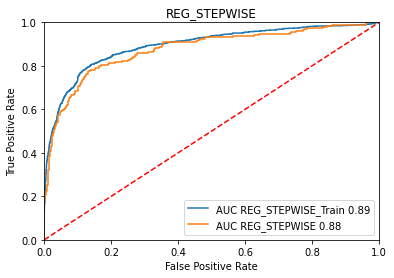

REG_STEPWISE CLASSIFICATION ACCURACY
REG_STEPWISE_Train  =  0.8850671140939598
REG_STEPWISE  =  0.8741610738255033
------




In [44]:
#Log regression stepwise

WHO = "REG_STEPWISE"

DEF = LogisticRegression( solver='newton-cg', max_iter=1000 )
DEF = DEF.fit( U_train, Y_train[ TARGET_F ] )

TRAIN_DEF = getProbAccuracyScores( WHO + "_Train", DEF, U_train, Y_train[ TARGET_F ] )
TEST_DEF = getProbAccuracyScores( WHO, DEF, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_DEF, TEST_DEF ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_DEF, TEST_DEF ] )

In [45]:
# Losses - Linear Regression Stepwise

AMT = LinearRegression()
AMT = AMT.fit( V_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_STEP_DEF_COEF = getCoefLogit( DEF, U_train )
REG_STEP_AMT_COEF = getCoefLinear( AMT, V_train )

REG_STEP_DEF = TEST_DEF.copy()
REG_STEP_AMT = TEST_AMT.copy()



REG_STEPWISE RMSE ACCURACY
REG_STEPWISE_Train  =  5328.739511962502
REG_STEPWISE  =  4796.838013306385
------



LOAN DEFAULT
---------
Total Variables:  9
INTERCEPT  =  -4.911673116757911
M_VALUE  =  4.098556805892479
IMP_YOJ  =  -0.02341240940951602
M_DEROG  =  -0.83088024905804
IMP_DELINQ  =  0.6934405276361009
IMP_CLAGE  =  -0.005841792543099743
M_DEBTINC  =  2.7930673308071388
IMP_DEBTINC  =  0.09656468858387042
z_IMP_JOB_MISSING  =  -0.9059895461187542

LOSSES
---------
Total Variables:  3
INTERCEPT  =  -4500.0506740134515
LOAN  =  0.7529168484932784
IMP_CLNO  =  242.9262087016695


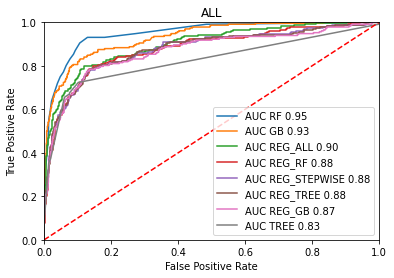

ALL CLASSIFICATION ACCURACY
RF  =  0.912751677852349
GB  =  0.910234899328859
REG_ALL  =  0.8901006711409396
REG_TREE  =  0.8766778523489933
REG_GB  =  0.8766778523489933
TREE  =  0.8766778523489933
REG_RF  =  0.875
REG_STEPWISE  =  0.8741610738255033
------


ALL LOSSES MODEL ACCURACY
GB  =  2422.2769707799052
RF  =  2951.0813707195125
REG_ALL  =  3634.676632630516
REG_TREE  =  4246.8855302376705
REG_RF  =  4358.06472084949
REG_GB  =  4358.06472084949
REG_STEPWISE  =  4796.838013306385
TREE  =  5722.46895603711
------




In [46]:
#run them all

WHO = "ALL"

ALL_DEF = [ TREE_DEF, RF_DEF, GB_DEF, REG_ALL_DEF, REG_TREE_DEF, REG_RF_DEF, REG_GB_DEF, REG_STEP_DEF ]

ALL_DEF = sorted( ALL_DEF, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_DEF ) 

ALL_DEF = sorted( ALL_DEF, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_DEF )


ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, REG_STEP_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL LOSSES MODEL ACCURACY", ALL_AMT )

#in real world - run models again with different random_state - if models are good results should be similar